In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
x1 = np.random.normal(0, 5, 1000)
x2 = np.random.normal(0, 1, 1000)

In [75]:
df = pd.DataFrame({
    'x1': x1, 
    'x2': x2
})

<AxesSubplot:xlabel='x1', ylabel='x2'>

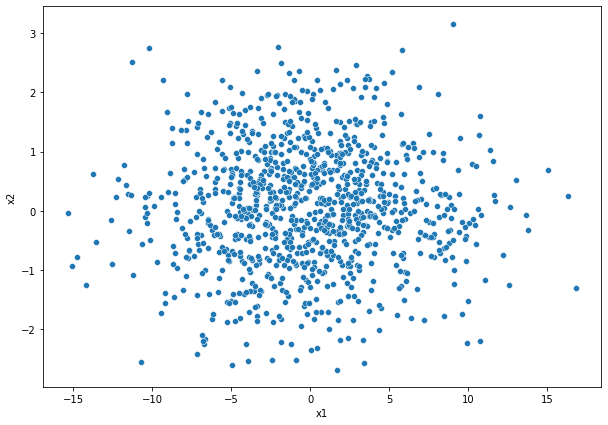

In [77]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)

In [101]:
def mahalanobis_distance(p, q, df):
    A = p - q
    B = (p - q).T
    covariance_matrix = np.array(df.cov())
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    return np.dot(np.dot(A, inverse_covariance_matrix), B)[0][0]

In [102]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [103]:
df

,x1,x2
0,-4.279507,0.614595
1,3.469758,-0.235385
2,-0.953102,0.726331
3,-13.769670,0.627979
4,-3.867234,1.153519
...,...,...
995,1.737563,-0.792141
996,4.304303,0.073625
997,-0.459638,-1.115768
998,-1.312912,0.670014


In [104]:
x1_min_arg = x1[np.argsort(x1)[0]]
x1_max_arg = x1[np.argsort(x1)[-1]]
x2_min_arg, x2_max_arg = x2[np.where((x2 > np.mean(x2) - .2) & (x2 < np.mean(x2) + .2))[0][0:2]]

<AxesSubplot:xlabel='x1', ylabel='x2'>

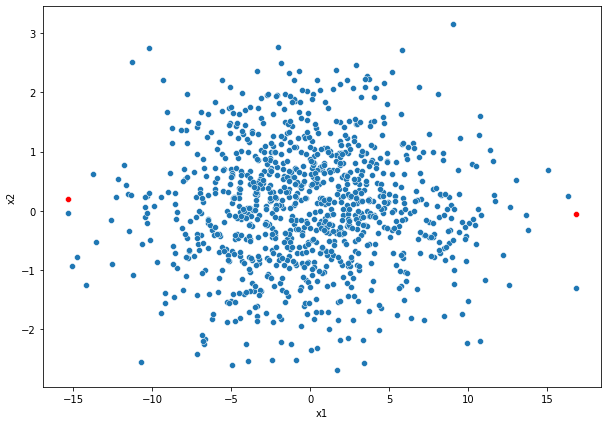

In [105]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=[x1_min_arg, x1_max_arg], y=[x2_min_arg, x2_max_arg], color='red')

In [106]:
p = np.array([[x1_min_arg, x2_min_arg]])
q = np.array([[x1_max_arg, x2_max_arg]])

In [107]:
euclidean_distance(p, q)

32.103026891613794

In [108]:
mahalanobis_distance(p, q, df)

40.47107700225744